In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [134]:
f"{0.1:.03f}"

'0.100'

In [50]:
def parse(df):
    def _parse_date(row):
        year, month, day, hour, minute = list(map(int, row[:-1]))
        date = datetime(year=year, month=month, day=day, hour=hour, minute=minute)
        row["date"] = date
        return row

    df = df.apply(_parse_date, axis=1)
    return df

In [51]:
data_with_cache = parse(data_with_cache)
data_with_cache.head()

,0,1,2,3,4,5,date
0,2022.0,10.0,15.0,0.0,10.0,81.405,2022-10-15 00:10:00
1,2022.0,10.0,15.0,0.0,20.0,61.257,2022-10-15 00:20:00
2,2022.0,10.0,15.0,0.0,30.0,56.652,2022-10-15 00:30:00
3,2022.0,10.0,15.0,0.0,40.0,50.282,2022-10-15 00:40:00
4,2022.0,10.0,15.0,0.0,50.0,48.218,2022-10-15 00:50:00


In [42]:
# def visualize(with_cache, without_cache):
#     data_with_cache = pd.read_csv(with_cache, header=0)
#     data_without_cache = pd.read_csv(without_cache, header=0)

#     data_with_cache = parse(data_with_cache)
#     data_without_cache = parse(data_without_cache)

#     sns.lineplot(x=data_with_cache["date"], y=data_with_cache["runtime"], color="blue")
#     sns.lineplot(x=data_without_cache["date"], y=data_without_cache["runtime"], color="orange")
#     plt.show()

In [130]:
# data_with_cache_2022_10_5_0 = pd.read_csv("../logs/citibike/2022_10_5_9_with_caching.csv", header=0)
# data_with_cache_2022_10_5_0 = parse(data_with_cache_2022_10_5_0)

# data_with_cache_2022_10_5_12 = pd.read_csv("../logs/citibike/2022_10_5_12_with_caching.csv", header=0)
# data_with_cache_2022_10_5_12 = parse(data_with_cache_2022_10_5_12)

data_with_cache_2022_10_15_9 = pd.read_csv("../logs/citibike/2022_10_15_9__with_caching.csv", header=None)
data_with_cache_2022_10_15_9 = parse(data_with_cache_2022_10_15_9)

data_with_cache_2022_10_15_12 = pd.read_csv("../logs/citibike/2022_10_15_12__with_caching.csv", header=None)
data_with_cache_2022_10_15_12 = parse(data_with_cache_2022_10_15_12)

data_with_cache_2022_10_15_15 = pd.read_csv("../logs/citibike/2022_10_15_15__with_caching.csv", header=None)
data_with_cache_2022_10_15_15 = parse(data_with_cache_2022_10_15_15)


data_with_cache_2022_10_25_9 = pd.read_csv("../logs/citibike/2022_10_25_9__with_caching.csv", header=None)
data_with_cache_2022_10_25_9 = parse(data_with_cache_2022_10_25_9)

data_with_cache_2022_10_25_12 = pd.read_csv("../logs/citibike/2022_10_25_12__with_caching.csv", header=None)
data_with_cache_2022_10_25_12 = parse(data_with_cache_2022_10_25_12)

data_with_cache_2022_10_25_15 = pd.read_csv("../logs/citibike/2022_10_25_15__with_caching.csv", header=None)
data_with_cache_2022_10_25_15 = parse(data_with_cache_2022_10_25_15)
# data_with_cache_2022_10_25_0 = pd.read_csv("../logs/citibike/2022_10_25_15_with_caching.csv", header=0)
# data_with_cache_2022_10_25_0 = parse(data_with_cache_2022_10_25_0)

# data_with_cache_2022_10_25_12 = pd.read_csv("../logs/citibike/2022_10_25_12_with_caching.csv", header=0)
# data_with_cache_2022_10_25_12 = parse(data_with_cache_2022_10_25_12)

In [108]:
data_with_cache_2022_10_15_9.head()

,0,1,2,3,4,5,date
0,2022.0,10.0,15.0,9.0,1.0,72.053,2022-10-15 09:01:00
1,2022.0,10.0,15.0,9.0,2.0,31.039,2022-10-15 09:02:00
2,2022.0,10.0,15.0,9.0,3.0,16.074,2022-10-15 09:03:00
3,2022.0,10.0,15.0,9.0,4.0,12.794,2022-10-15 09:04:00
4,2022.0,10.0,15.0,9.0,5.0,11.844,2022-10-15 09:05:00


In [109]:
plt.rcParams.update({'font.size': 15, "font.family": "Times New Roman"})

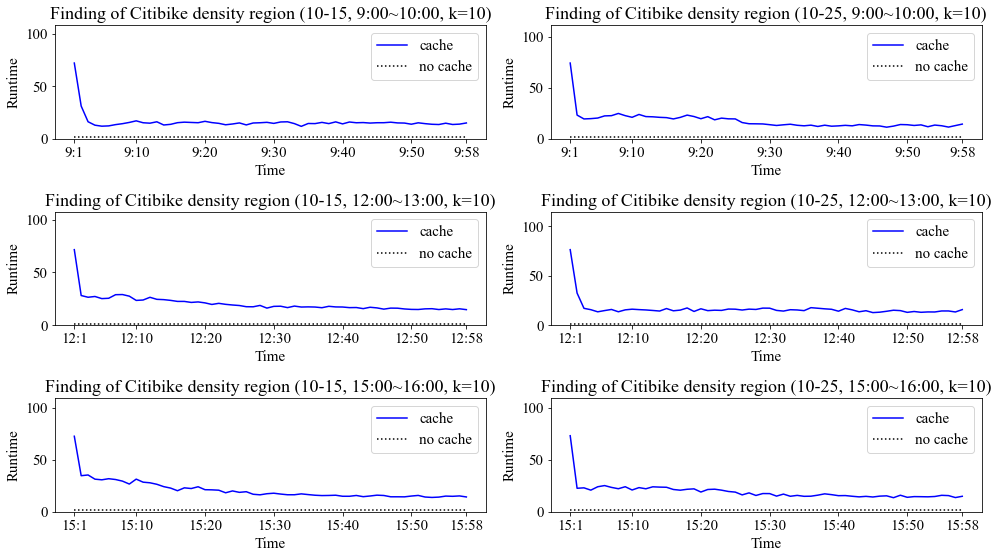

In [142]:

plt.figure(figsize=(14, 8))

plt.subplot(3, 2, 1)
sns.lineplot(x=data_with_cache_2022_10_15_9["date"], y=data_with_cache_2022_10_15_9.iloc[:, 5], color="blue", label="cache")
plt.hlines([1.3618], xmin=data_with_cache_2022_10_15_9["date"].min(), xmax=data_with_cache_2022_10_15_9["date"].max(), colors=["k"], linestyles=["dotted"], label="no cache")
plt.title("Finding of Citibike density region (10-15, 9:00~10:00, k=10)")
plt.xlabel("Time")
plt.ylabel("Runtime")
plt.ylim([0, data_with_cache_2022_10_15_9.iloc[0, 5]*1.5])
plt.xticks(
    ticks=[data_with_cache_2022_10_15_9["date"].iloc[0]] \
        + [date for date in data_with_cache_2022_10_15_9["date"] if date.minute%10 == 0] \
        + [data_with_cache_2022_10_15_9["date"].iloc[-1]], 
    labels=[f"{data_with_cache_2022_10_15_9['date'].iloc[0].hour}:{data_with_cache_2022_10_15_9['date'].iloc[0].minute}"] \
        + [f"{date.hour}:{date.minute}" for date in data_with_cache_2022_10_15_9["date"] if date.minute%10 == 0] \
        + [f"{data_with_cache_2022_10_15_9['date'].iloc[-1].hour}:{data_with_cache_2022_10_15_9['date'].iloc[-1].minute}"]
)
plt.legend()

plt.subplot(3, 2, 3)
sns.lineplot(x=data_with_cache_2022_10_15_12["date"], y=data_with_cache_2022_10_15_12.iloc[:, 5], color="blue", label="cache")
plt.hlines([1.3618], xmin=data_with_cache_2022_10_15_12["date"].min(), xmax=data_with_cache_2022_10_15_12["date"].max(), colors=["k"], linestyles=["dotted"], label="no cache")
plt.title("Finding of Citibike density region (10-15, 12:00~13:00, k=10)")
plt.xlabel("Time")
plt.ylabel("Runtime")
plt.ylim([0, data_with_cache_2022_10_15_12.iloc[0, 5]*1.5])
plt.xticks(
    ticks=[data_with_cache_2022_10_15_12["date"].iloc[0]] \
        + [date for date in data_with_cache_2022_10_15_12["date"] if date.minute%10 == 0] \
        + [data_with_cache_2022_10_15_12["date"].iloc[-1]], 
    labels=[f"{data_with_cache_2022_10_15_12['date'].iloc[0].hour}:{data_with_cache_2022_10_15_12['date'].iloc[0].minute}"] \
        + [f"{date.hour}:{date.minute}" for date in data_with_cache_2022_10_15_12["date"] if date.minute%10 == 0] \
        + [f"{data_with_cache_2022_10_15_12['date'].iloc[-1].hour}:{data_with_cache_2022_10_15_12['date'].iloc[-1].minute}"]
)
plt.legend()

plt.subplot(3, 2, 5)
sns.lineplot(x=data_with_cache_2022_10_15_15["date"], y=data_with_cache_2022_10_15_15.iloc[:, 5], color="blue", label="cache")
plt.hlines([1.3618], xmin=data_with_cache_2022_10_15_15["date"].min(), xmax=data_with_cache_2022_10_15_15["date"].max(), colors=["k"], linestyles=["dotted"], label="no cache")
plt.title("Finding of Citibike density region (10-15, 15:00~16:00, k=10)")
plt.xlabel("Time")
plt.ylabel("Runtime")
plt.ylim([0, data_with_cache_2022_10_15_15.iloc[0, 5]*1.5])
plt.xticks(
    ticks=[data_with_cache_2022_10_15_15["date"].iloc[0]] \
        + [date for date in data_with_cache_2022_10_15_15["date"] if date.minute%10 == 0] \
        + [data_with_cache_2022_10_15_15["date"].iloc[-1]], 
    labels=[f"{data_with_cache_2022_10_15_15['date'].iloc[0].hour}:{data_with_cache_2022_10_15_15['date'].iloc[0].minute}"] \
        + [f"{date.hour}:{date.minute}" for date in data_with_cache_2022_10_15_15["date"] if date.minute%10 == 0] \
        + [f"{data_with_cache_2022_10_15_15['date'].iloc[-1].hour}:{data_with_cache_2022_10_15_15['date'].iloc[-1].minute}"]
)
plt.legend()




plt.subplot(3, 2, 2)
sns.lineplot(x=data_with_cache_2022_10_25_9["date"], y=data_with_cache_2022_10_25_9.iloc[:, 5], color="blue", label="cache")
plt.hlines([1.3618], xmin=data_with_cache_2022_10_25_9["date"].min(), xmax=data_with_cache_2022_10_25_9["date"].max(), colors=["k"], linestyles=["dotted"], label="no cache")
plt.title("Finding of Citibike density region (10-25, 9:00~10:00, k=10)")
plt.xlabel("Time")
plt.ylabel("Runtime")
plt.ylim([0, data_with_cache_2022_10_25_9.iloc[0, 5]*1.5])
plt.xticks(
    ticks=[data_with_cache_2022_10_25_9["date"].iloc[0]] \
        + [date for date in data_with_cache_2022_10_25_9["date"] if date.minute%10 == 0] \
        + [data_with_cache_2022_10_25_9["date"].iloc[-1]], 
    labels=[f"{data_with_cache_2022_10_25_9['date'].iloc[0].hour}:{data_with_cache_2022_10_25_9['date'].iloc[0].minute}"] \
        + [f"{date.hour}:{date.minute}" for date in data_with_cache_2022_10_25_9["date"] if date.minute%10 == 0] \
        + [f"{data_with_cache_2022_10_25_9['date'].iloc[-1].hour}:{data_with_cache_2022_10_25_9['date'].iloc[-1].minute}"]
)
plt.legend()

plt.subplot(3, 2, 4)
sns.lineplot(x=data_with_cache_2022_10_25_12["date"], y=data_with_cache_2022_10_25_12.iloc[:, 5], color="blue", label="cache")
plt.hlines([1.3618], xmin=data_with_cache_2022_10_25_12["date"].min(), xmax=data_with_cache_2022_10_25_12["date"].max(), colors=["k"], linestyles=["dotted"], label="no cache")
plt.title("Finding of Citibike density region (10-25, 12:00~13:00, k=10)")
plt.xlabel("Time")
plt.ylabel("Runtime")
plt.ylim([0, data_with_cache_2022_10_25_12.iloc[0, 5]*1.5])
plt.xticks(
    ticks=[data_with_cache_2022_10_25_12["date"].iloc[0]] \
        + [date for date in data_with_cache_2022_10_25_12["date"] if date.minute%10 == 0] \
        + [data_with_cache_2022_10_25_12["date"].iloc[-1]], 
    labels=[f"{data_with_cache_2022_10_25_12['date'].iloc[0].hour}:{data_with_cache_2022_10_25_12['date'].iloc[0].minute}"] \
        + [f"{date.hour}:{date.minute}" for date in data_with_cache_2022_10_25_12["date"] if date.minute%10 == 0] \
        + [f"{data_with_cache_2022_10_25_12['date'].iloc[-1].hour}:{data_with_cache_2022_10_25_12['date'].iloc[-1].minute}"]
)
plt.legend()

plt.subplot(3, 2, 6)
sns.lineplot(x=data_with_cache_2022_10_25_15["date"], y=data_with_cache_2022_10_25_15.iloc[:, 5], color="blue", label="cache")
plt.hlines([1.3618], xmin=data_with_cache_2022_10_25_15["date"].min(), xmax=data_with_cache_2022_10_25_15["date"].max(), colors=["k"], linestyles=["dotted"], label="no cache")
plt.title("Finding of Citibike density region (10-25, 15:00~16:00, k=10)")
plt.xlabel("Time")
plt.ylabel("Runtime")
plt.ylim([0, data_with_cache_2022_10_15_15.iloc[0, 5]*1.5])
plt.xticks(
    ticks=[data_with_cache_2022_10_25_15["date"].iloc[0]] \
        + [date for date in data_with_cache_2022_10_25_15["date"] if date.minute%10 == 0] \
        + [data_with_cache_2022_10_25_15["date"].iloc[-1]], 
    labels=[f"{data_with_cache_2022_10_25_15['date'].iloc[0].hour}:{data_with_cache_2022_10_25_15['date'].iloc[0].minute}"] \
        + [f"{date.hour}:{date.minute}" for date in data_with_cache_2022_10_25_15["date"] if date.minute%10 == 0] \
        + [f"{data_with_cache_2022_10_25_15['date'].iloc[-1].hour}:{data_with_cache_2022_10_25_15['date'].iloc[-1].minute}"]
)
plt.legend()


plt.tight_layout()
plt.savefig("citibike_density_region.png")
plt.show()